In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer 

In [17]:
data = pd.read_csv('data/laptopData.csv')

# Dataset information

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [19]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Data Checks to perform

## Missing values

In [20]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


## Check Duplicates

In [21]:
duplicates = data.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)


Number of Duplicates: 29


## Check data type

In [22]:
data_types = data.dtypes
print("\nData Types:")
print(data_types)


Data Types:
Unnamed: 0          float64
Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object


## Check the number of unique values of each column

In [23]:
unique_values = data.nunique()
print("\nNumber of Unique Values:")
print(unique_values)


Number of Unique Values:
Unnamed: 0          1273
Company               19
TypeName               6
Inches                25
ScreenResolution      40
Cpu                  118
Ram                   10
Memory                40
Gpu                  110
OpSys                  9
Weight               189
Price                777
dtype: int64


## Check statistics of data set

In [24]:
data_statistics = data.describe(include='all')
data_statistics

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1273.000000,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273.000000
unique,NaN,19,6,25,40,118,10,40,110,9,189,NaN
top,NaN,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,290,710,640,495,183,601,401,271,1047,111,NaN
mean,652.674784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59955.814073
std,376.493027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37332.251005
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,327.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31914.720000
50%,652.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52161.120000
75%,980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79333.387200


## Check various categories present in the different categorical column

In [25]:
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    categories = data[column].unique()
    print(f"\nCategories in '{column}':")
    print(categories)


Categories in 'Company':
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' nan 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Categories in 'TypeName':
['Ultrabook' 'Notebook' nan 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']

Categories in 'Inches':
['13.3' '15.6' '15.4' '14' '12' nan '17.3' '13.5' '12.5' '13' '18.4'
 '13.9' '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17'
 '15' '14.1' '11.3' '10.1']

Categories in 'ScreenResolution':
['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080' nan
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'Touchscreen 2256x1504' 'Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel 1366x768' 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K 

## Drop 'Unnamed: 0' columne

In [26]:
data = data.drop('Unnamed: 0',axis=1)

## Remove duplicates 

In [27]:
data_no_duplicates = data.drop_duplicates()

data_no_duplicates.reset_index(drop=True, inplace=True)

print("Shape before removing duplicates:", data.shape)
print("Shape after removing duplicates:", data_no_duplicates.shape)

Shape before removing duplicates: (1303, 11)
Shape after removing duplicates: (1245, 11)


## transform the 'Weight' column into intervals

In [28]:
# Replace '?' with NaN
data['Weight'] = data['Weight'].replace('?', np.nan)

# Extract numeric values and convert 'kg' to NaN
data['Weight'] = data['Weight'].str.replace('kg', '').astype(float)

# Impute missing values with mean
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
data['Weight'] = imp_mean.fit_transform(data[['Weight']])
data['Weight']

TypeError: float() argument must be a string or a number, not 'NAType'

# Data visualization

## 1. Histogram of 'Inches' column

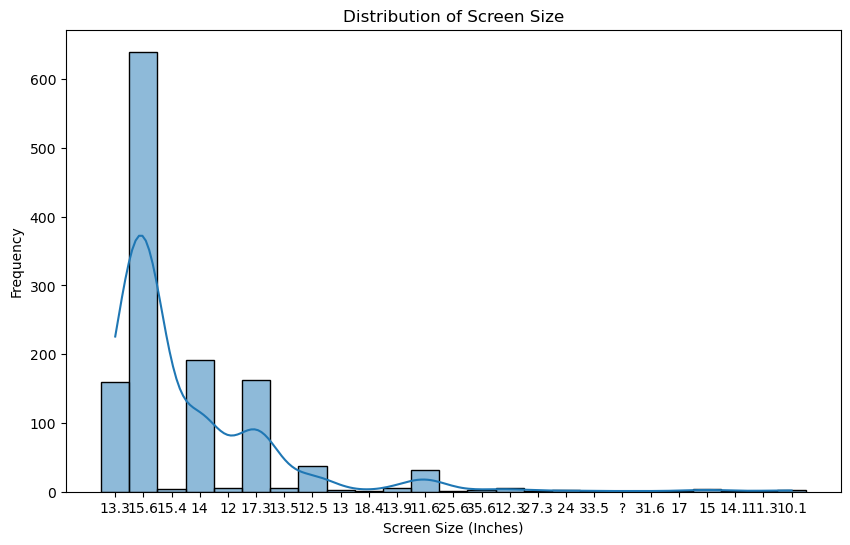

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Inches', bins=20, kde=True)
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Frequency')
plt.title('Distribution of Screen Size')
plt.show()

## 2. Boxplot of 'Price' across different 'Company'

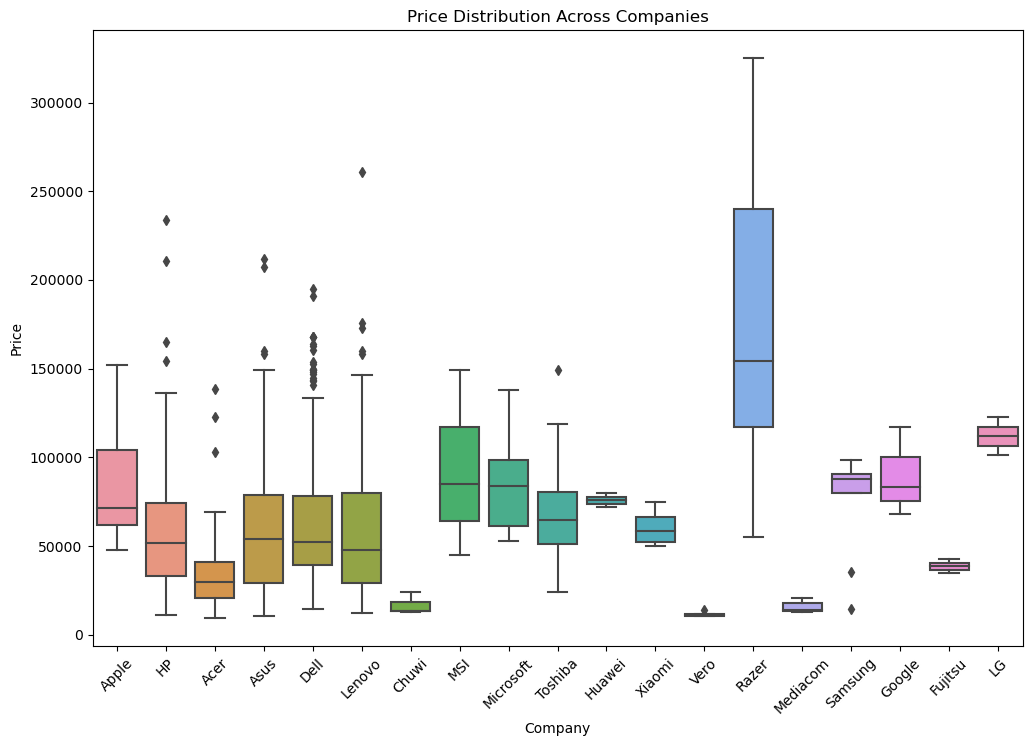

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Company', y='Price')
plt.xticks(rotation=45)
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Price Distribution Across Companies')
plt.show()

## 3. Barplot of counts of 'OpSys'

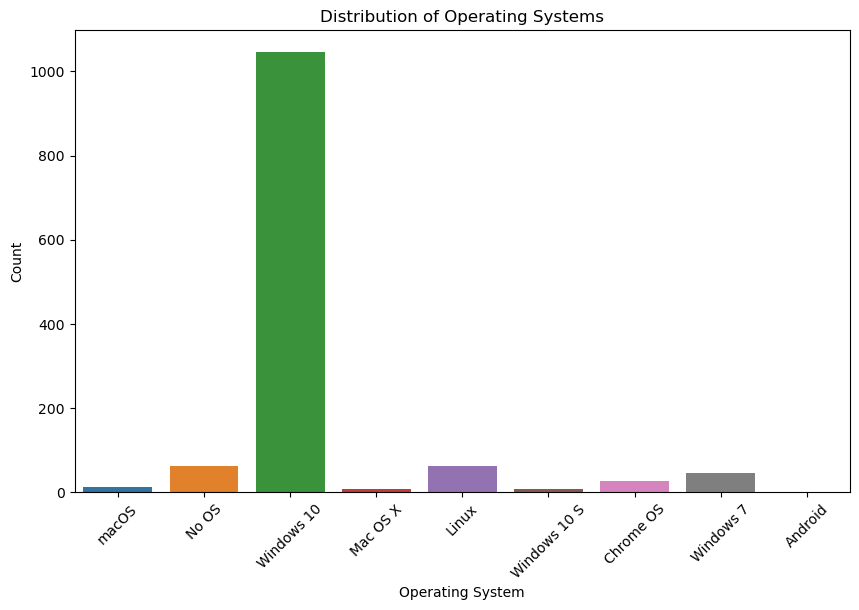

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='OpSys')
plt.xticks(rotation=45)
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.title('Distribution of Operating Systems')
plt.show()

## 4. Scatter plot of 'Price' vs 'Weight'

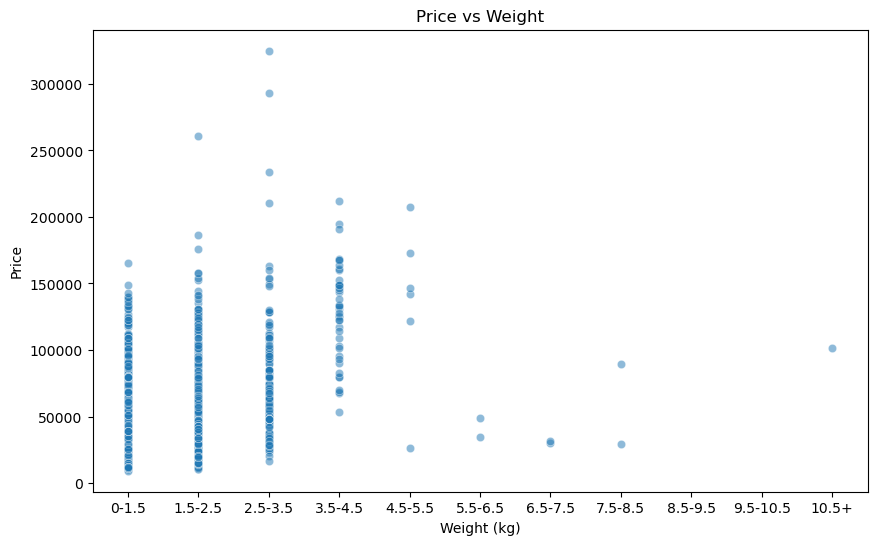

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Weight', y='Price', alpha=0.5)
plt.xlabel('Weight (kg)')
plt.ylabel('Price')
plt.title('Price vs Weight')
plt.show()

## 5. Pie chart of distribution of 'Company'

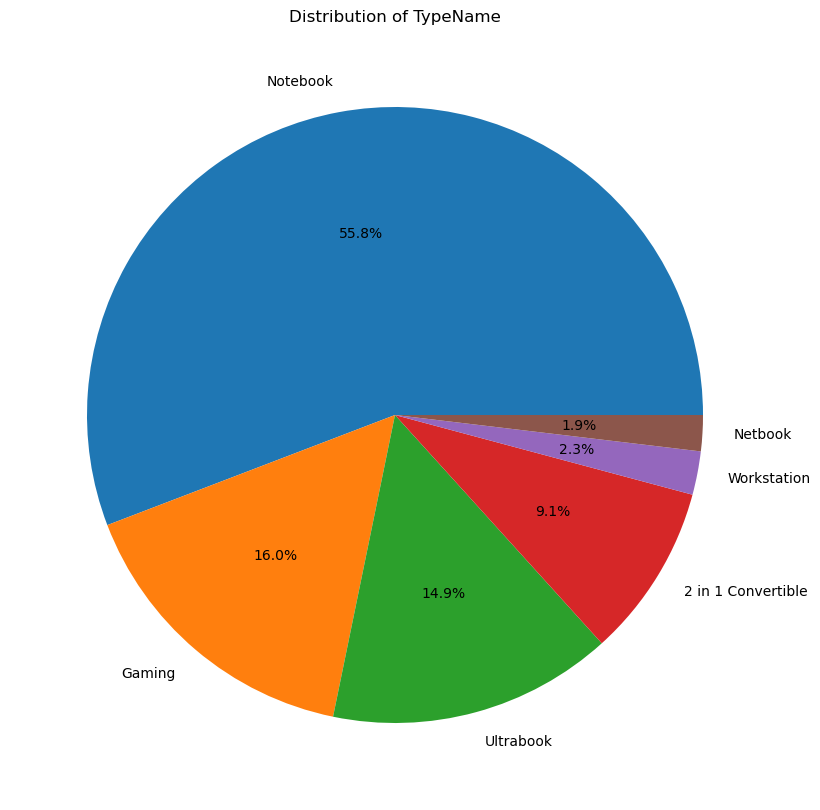

In [25]:
plt.figure(figsize=(10, 10))
data['TypeName'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of TypeName')
plt.ylabel('')
plt.show()

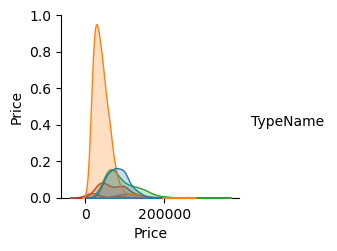

In [28]:
sns.pairplot(data,hue = 'TypeName')
plt.show()